In [25]:
import scanpy as sc
import pandas as pd
import numpy as np
import os 
import sys 
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/02_Integration/adata/adata_scanvi_cuda_refinement.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 202731 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet', 'leiden', 'IGA_First_GenAnno', 'scanvi_prediction', 'IGA_PostScAnvi_GenAnno_colors'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'IGA_PostScAnvi_GenAnno_colors_colors', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'predicted_labels_colors', 'scanvi_prediction_colors', 'subtype_colors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

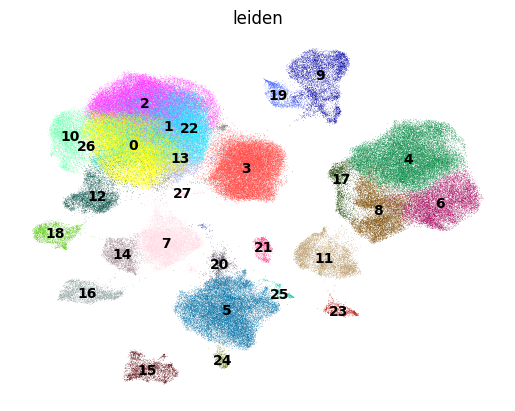

In [31]:
sc.pl.umap(
    adata,
    color=["leiden"],
    frameon=False,legend_loc = 'on data',
    ncols=3,)

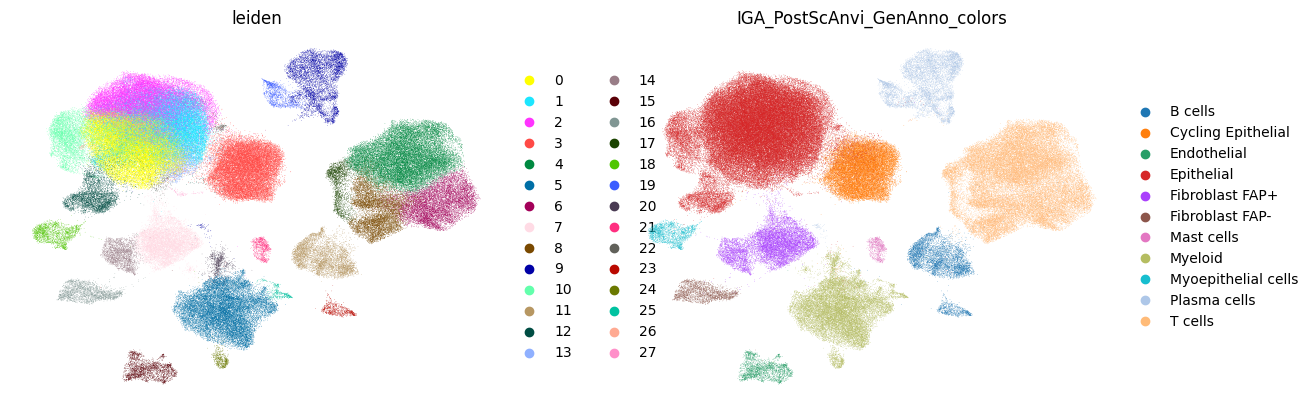

In [5]:
sc.pl.umap(
    adata,
    color=["leiden","IGA_PostScAnvi_GenAnno_colors"],
    frameon=False,
    ncols=3,)

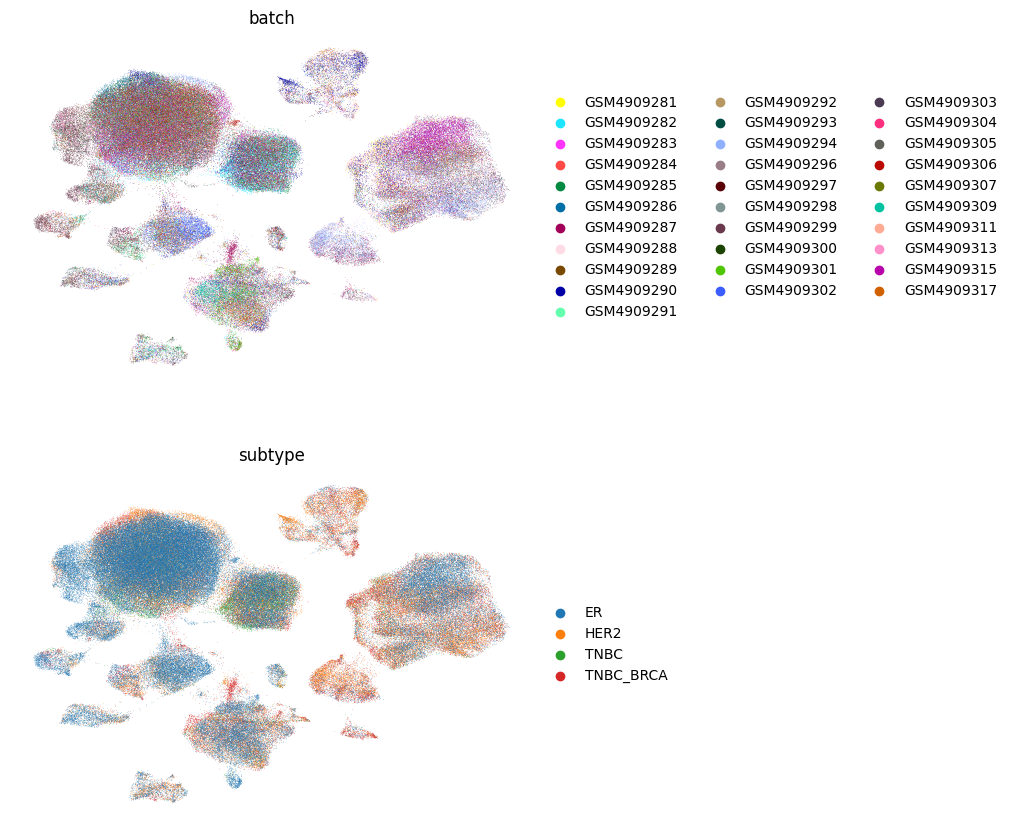

In [8]:
sc.pl.umap(
    adata,
    color=["batch","subtype"],
    frameon=False,
    ncols=1,)

In [9]:
adata.obs.IGA_PostScAnvi_GenAnno_colors.value_counts()

Epithelial             90418
T cells                39903
Cycling Epithelial     20964
Myeloid                19409
Fibroblast FAP+        11062
Plasma cells            7402
B cells                 6053
Endothelial             2397
Fibroblast FAP-         2278
Myoepithelial cells     1992
Mast cells               853
Name: IGA_PostScAnvi_GenAnno_colors, dtype: int64

In [16]:
epi_mask = adata.obs.IGA_PostScAnvi_GenAnno_colors.isin(["Epithelial","Myoepithelial cells","Cycling Epithelial"])

In [22]:
adata_epi = adata[adata.obs.IGA_PostScAnvi_GenAnno_colors.isin(["Epithelial","Myoepithelial cells","Cycling Epithelial"]),:].copy()

In [34]:
adata_epi.obs.leiden.value_counts()

0     25478
1     25207
2     23986
3     22249
10     5622
12     4696
13     3106
18     2001
22      701
26       91
27       74
20       42
7        37
5        34
9        29
11        6
4         4
6         3
8         2
15        2
16        2
17        2
Name: leiden, dtype: int64

In [43]:
# Remove residual cells 
mask = adata_epi.obs.leiden.isin(['20','7','5','9','11','4','6','8','15','16','17'])
adata_epi = adata_epi[~mask,:]

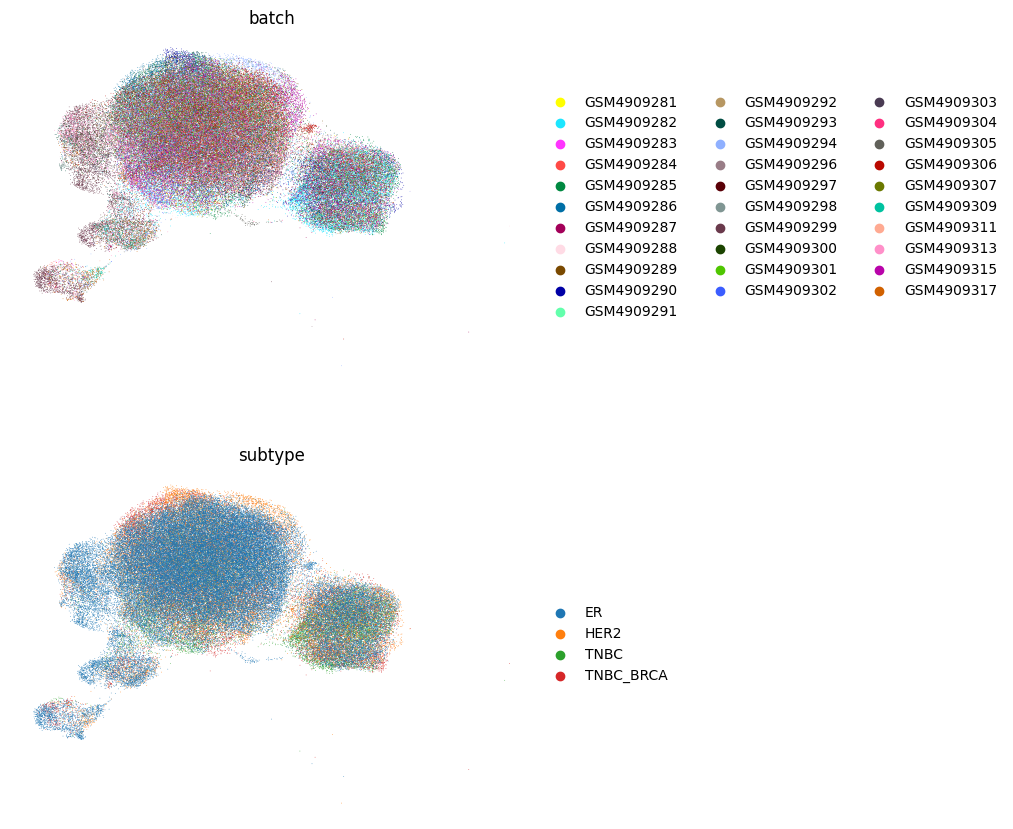

In [40]:
sc.pl.umap(
    adata_epi,
    color=["batch","subtype"],
    frameon=False,
    ncols=1,)

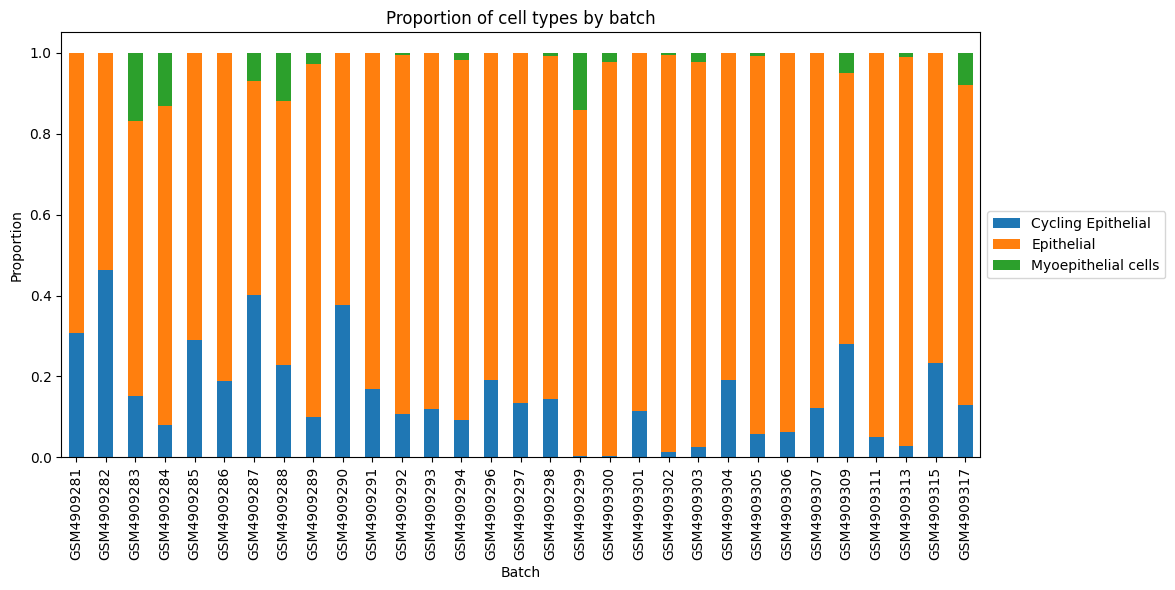

In [41]:
df_counts = (
    adata_epi.obs
    .groupby(['batch', 'IGA_PostScAnvi_GenAnno_colors'], observed=True)
    .size()                       
    .unstack(fill_value=0)       
)
df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0)
ax = df_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Batch')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of cell types by batch')
plt.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

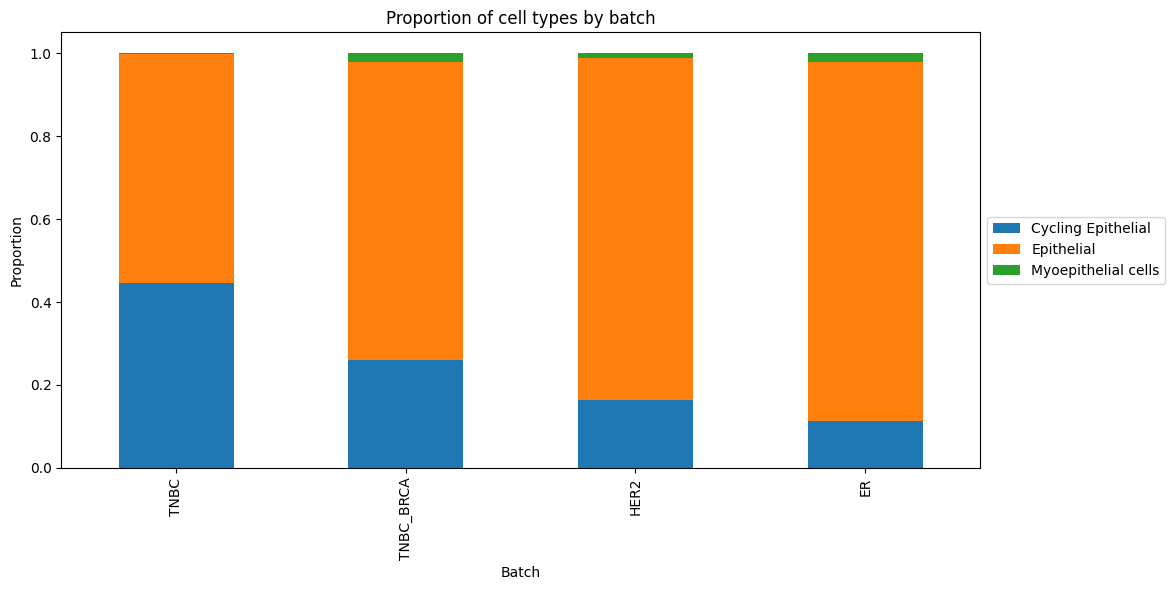

In [42]:
df_counts = (
    adata_epi.obs
    .groupby(['subtype', 'IGA_PostScAnvi_GenAnno_colors'], observed=True)
    .size()                       
    .unstack(fill_value=0)       
)
df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0)
ax = df_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Batch')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of cell types by batch')
plt.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

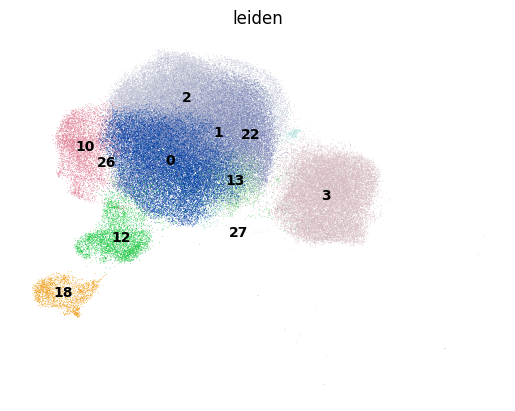

In [38]:
sc.pl.umap(
    adata_epi,
    color=["leiden"],
    frameon=False,legend_loc = 'on data',
    ncols=1,)

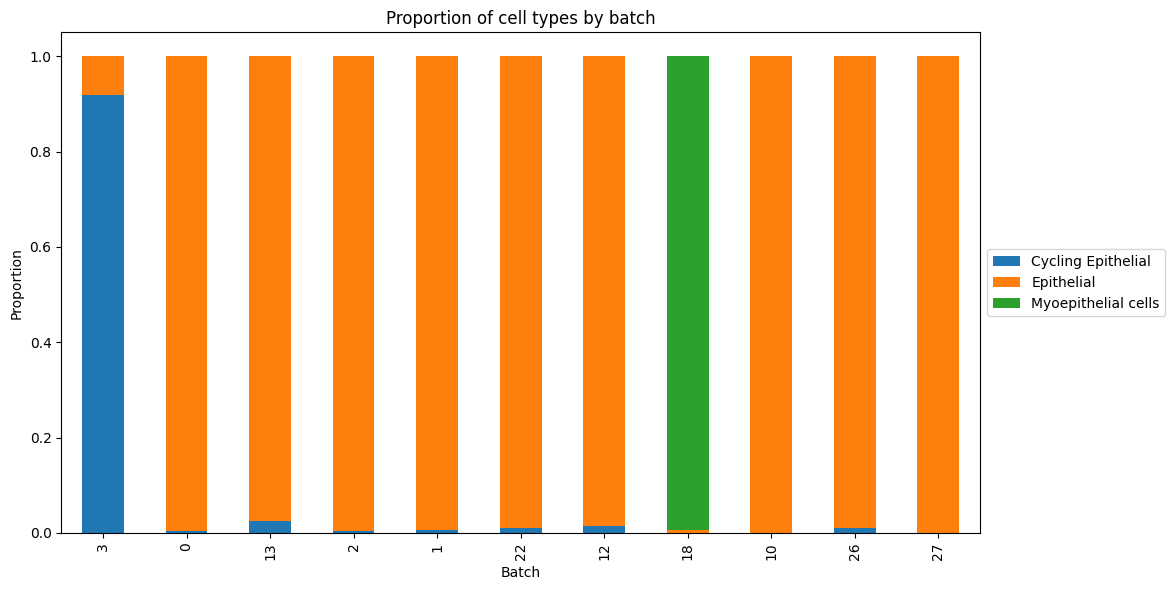

In [39]:
df_counts = (
    adata_epi.obs
    .groupby(['leiden', 'IGA_PostScAnvi_GenAnno_colors'], observed=True)
    .size()                       
    .unstack(fill_value=0)       
)
df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0)
ax = df_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Batch')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of cell types by batch')
plt.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

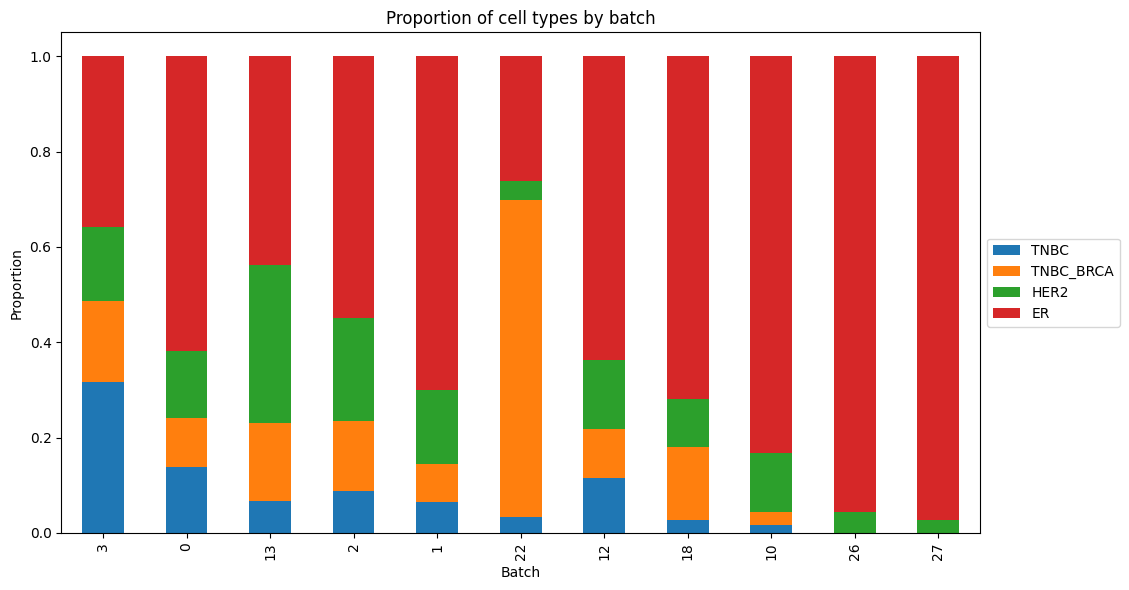

In [77]:
df_counts = (
    adata_epi.obs
    .groupby(['leiden', 'subtype'], observed=True)
    .size()                       
    .unstack(fill_value=0)       
)
df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0)
ax = df_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Batch')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of cell types by batch')
plt.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [78]:
adata_epi.obs.leiden.value_counts()

0     25478
1     25207
2     23986
3     22249
10     5622
12     4696
13     3106
18     2001
22      701
26       91
27       74
Name: leiden, dtype: int64

In [79]:
general_markers  = ["EPCAM","MKI67", "ACTA2", "KRT5", "KRT14", 'ERBB2','ESR1','BRCA1', 
                    "KRT8", "KRT18",'GATA3', 'FOXA1','EGFR']

Text(0.5, 1.0, '')

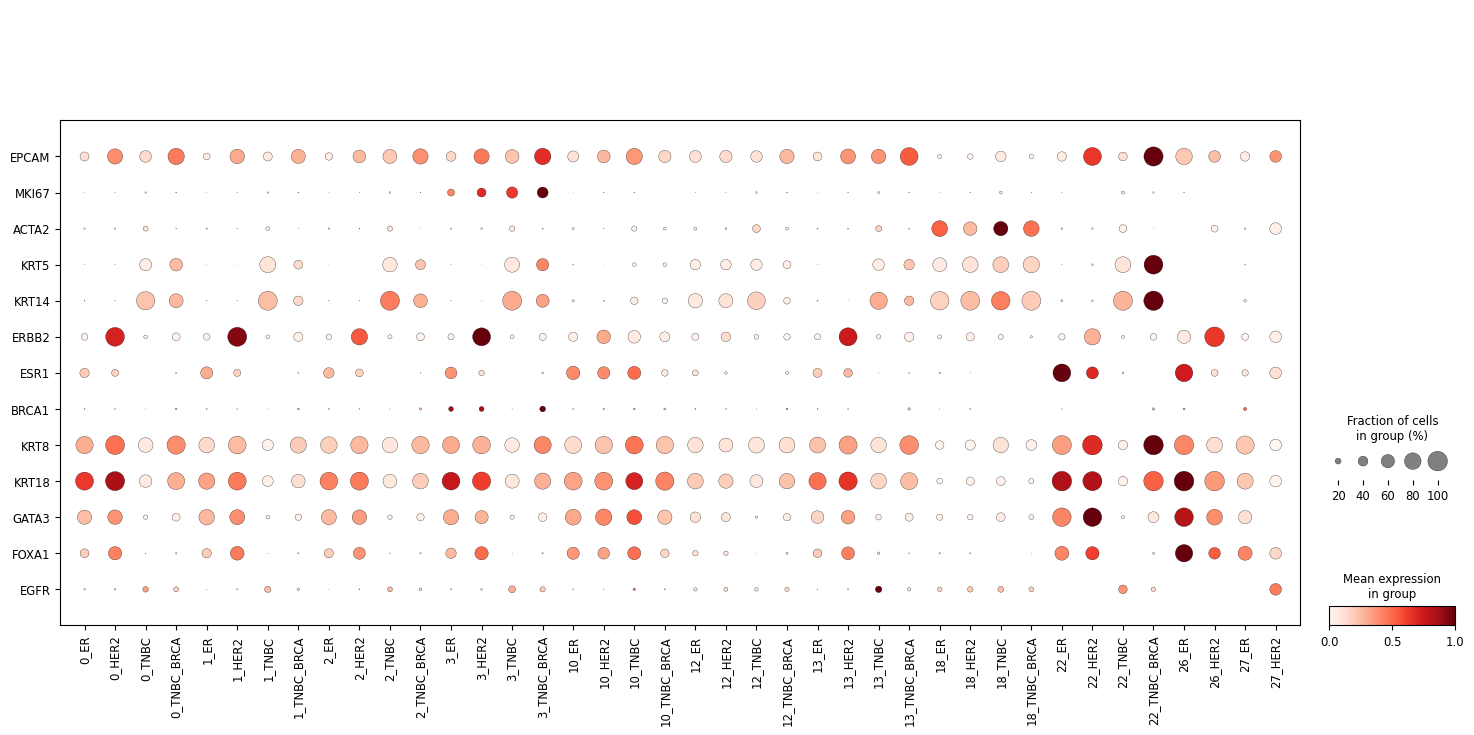

In [80]:
fig, ax = plt.subplots(figsize=(18, 8))

dp = sc.pl.dotplot(adata=adata_epi, var_names=general_markers, groupby=["leiden","subtype"],
              swap_axes = True, show = False, ax = ax,standard_scale = 'var')
ax = dp["mainplot_ax"]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('', pad=10)